# Setup and Reading csv Files

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [9]:
# Get a list of all CSV files in the directory
# csv_files = glob.glob('BoxCar\\output\\*.csv')
csv_files = glob.glob('BoxCar/output/*.csv')

# Read each CSV file into a DataFrame and store them in a list
dataframes = [pd.read_csv(file) for file in csv_files]

# Find the lengths of each DataFrame
lengths = [len(df) for df in dataframes]
print("Lengths of each DataFrame:", lengths)



# Sort the dataframes into two lists based on the number of rows
total_dataframes = [df for df in dataframes if len(df) == min(lengths)]
single_dataframes = [df for df in dataframes if len(df) != min(lengths)]

# Optionally, you can concatenate all DataFrames in each list into a single DataFrame
total_data = pd.DataFrame()
for df in total_dataframes:
    total_data = pd.merge(total_data, df, how='outer', left_index=True, right_index=True)
  
single_data = pd.DataFrame()  
for df in single_dataframes:
    single_data = pd.merge(single_data, df, how='outer', left_index=True, right_index=True)
    
    
print("Columns in total_data:")
print(total_data.columns)

print("\nColumns in single_data:")
print(single_data.columns)

Lengths of each DataFrame: [26192, 193247, 193243, 26192, 88275, 193243, 26192, 26192, 193256, 193243, 193256, 26192, 26192, 26192, 26192, 193256, 193243, 193256, 193243]
Columns in total_data:
Index(['Driver Idle Percentages', 'Driver Total Profit', 'Driver Total Costs',
       'Driver Total Idle Times', 'Driver Total Rides',
       'Driver Total Distance', 'Driver Total Times', 'Driver Total Earnings'],
      dtype='object')

Columns in single_data:
Index(['Rider Wait Time Pickups', 'Driver Single Trip Costs',
       'Driver Single Idle Times', 'Rider Wait Time Dropoffs',
       'Driver Single Trip Times', 'Rider Direct Time To Dropoffs',
       'Rider Wait Time Assignments', 'Rider Pickup To Drive Ratios',
       'Driver Single Trip Earnings', 'Driver Single Trip Distances',
       'Driver Single Trip Profit'],
      dtype='object')


# Rider Metrics Investigation

## Wait Times


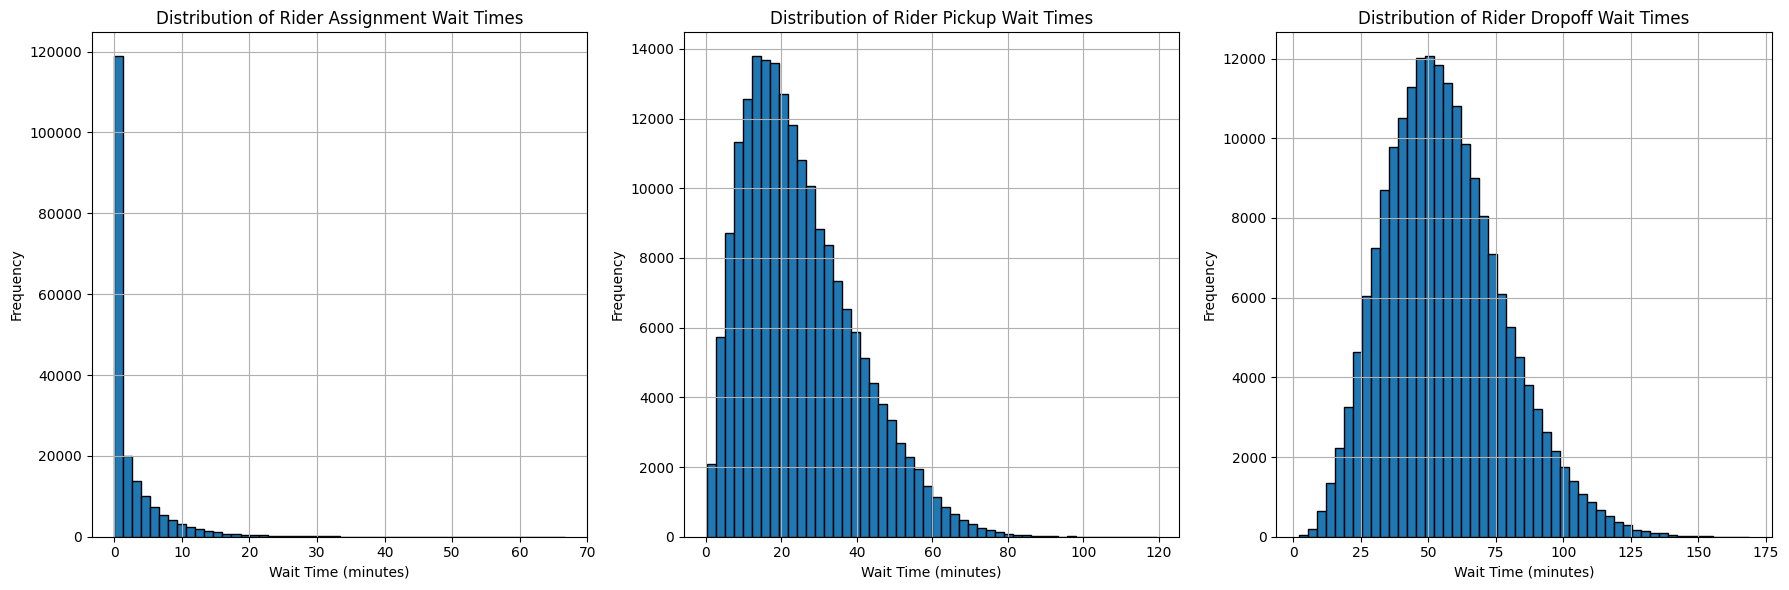

Number of assignment wait times more than 20 minutes: 1970


In [10]:
# Plot the histograms for the rider wait times
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
single_data['Rider Wait Time Assignments'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Rider Assignment Wait Times')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
single_data['Rider Wait Time Pickups'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Rider Pickup Wait Times')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
single_data['Rider Wait Time Dropoffs'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Rider Dropoff Wait Times')
plt.xlabel('Wait Time (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

assignment_wait_times_above_20 = single_data[single_data['Rider Wait Time Assignments'] > 20].shape[0]
print(f"Number of assignment wait times more than 20 minutes: {assignment_wait_times_above_20}")

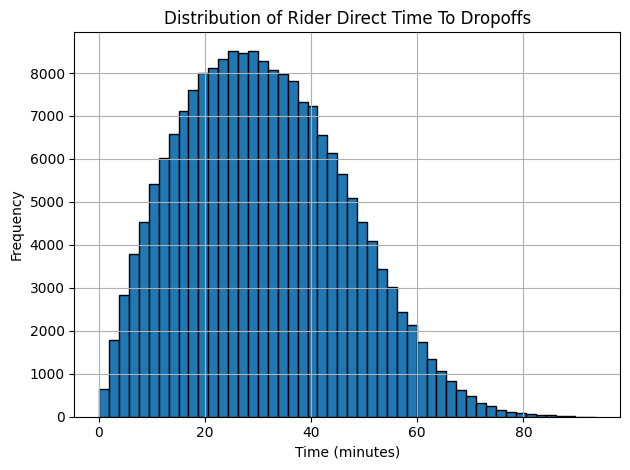

In [11]:
plt.subplot(1, 1, 1)
single_data['Rider Direct Time To Dropoffs'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Rider Direct Time To Dropoffs')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

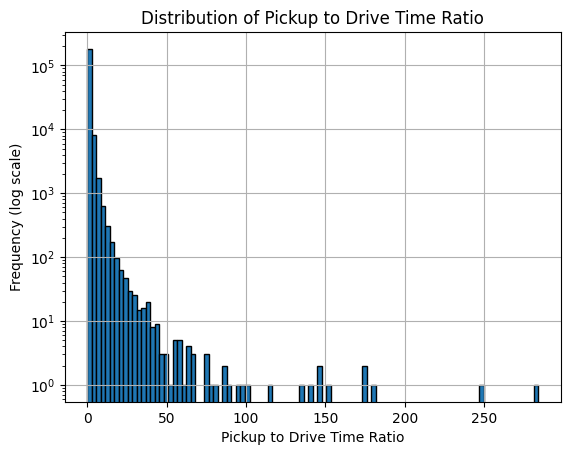

Number of trips with a pickup time less than the drive time is: 67.02%


In [12]:
# Plot the distribution of the ratio on a logarithmic y scale
single_data['Rider Pickup To Drive Ratios'].hist(bins=100, edgecolor='black')
plt.yscale('log')
plt.title('Distribution of Pickup to Drive Time Ratio')
plt.xlabel('Pickup to Drive Time Ratio')
plt.ylabel('Frequency (log scale)')
plt.show()

trips_ratio = single_data[single_data['Rider Pickup To Drive Ratios'] <= 1].shape[0]
print(f"Number of trips with a pickup time less than the drive time is: {trips_ratio / single_data.shape[0] * 100:.2f}%")

# Driver Metrics Investigation

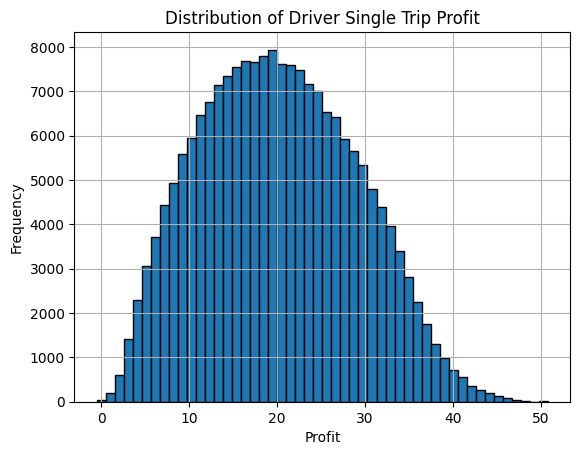

Number of trips with negative profits: 10


In [13]:
# Plot the distribution of 'Driver Single Trip Profit'
single_data['Driver Single Trip Profit'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Driver Single Trip Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

# Find the number of trips with negative profits
negative_profit_trips = single_data[single_data['Driver Single Trip Profit'] < 0].shape[0]
print(f"Number of trips with negative profits: {negative_profit_trips}")

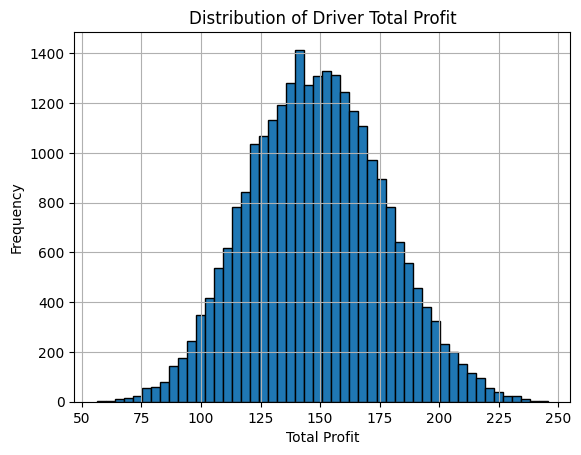

The driver with the lowest profit drove 3 trips, totaling 56.45 miles over 5.68 hours and made $56.35.
The driver with the highest profit drove 10 trips, totaling 164.41 miles over 7.88 hours and made $245.60.
The average driver drove 7.38 trips, totaling 131.44 miles over 6.50 hours and made $148.62 in profit.


In [14]:
total_data['Driver Total Profit'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Driver Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Frequency')
plt.show()

lowest_profit_index = total_data['Driver Total Profit'].idxmin()
print(f"The driver with the lowest profit drove {total_data.loc[lowest_profit_index, 'Driver Total Rides']} trips, totaling {total_data.loc[lowest_profit_index, 'Driver Total Distance']:.2f} miles over {total_data.loc[lowest_profit_index, 'Driver Total Times']/60:.2f} hours and made ${total_data.loc[lowest_profit_index, 'Driver Total Profit']:.2f}.")

highest_profit_index = total_data['Driver Total Profit'].idxmax()
print(f"The driver with the highest profit drove {total_data.loc[highest_profit_index, 'Driver Total Rides']} trips, totaling {total_data.loc[highest_profit_index, 'Driver Total Distance']:.2f} miles over {total_data.loc[highest_profit_index, 'Driver Total Times']/60:.2f} hours and made ${total_data.loc[highest_profit_index, 'Driver Total Profit']:.2f}.")

average_driver = total_data.mean()
print(f"The average driver drove {average_driver['Driver Total Rides']:.2f} trips, totaling {average_driver['Driver Total Distance']:.2f} miles over {average_driver['Driver Total Times']/60:.2f} hours and made ${average_driver['Driver Total Profit']:.2f} in profit.")

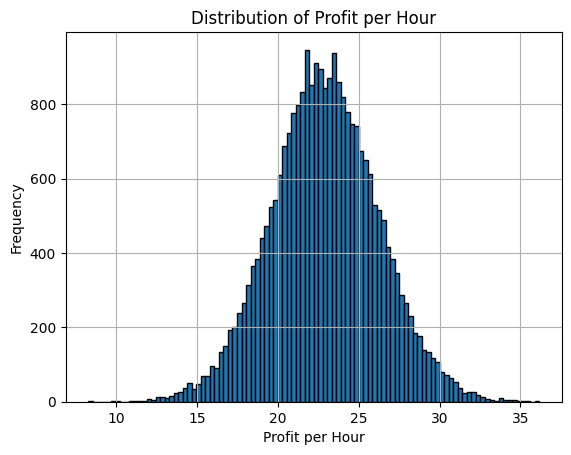

Number of drivers that make less than £12.60 per hour: 32


In [15]:
# Calculate the total driver profits over total driver available time
total_data['Profit per Hour'] = total_data['Driver Total Profit'] / (total_data['Driver Total Times'] / 60)

# Display the first few rows to verify the calculation
# print(total_data[['Driver Total Profit', 'Driver Total Times', 'Profit per Hour']].head())

# Plot the 'Profit per Hour' distribution
total_data['Profit per Hour'].hist(bins=100, edgecolor='black')
plt.title('Distribution of Profit per Hour')
plt.xlabel('Profit per Hour')
plt.ylabel('Frequency')
plt.show()

drivers_below_threshold = total_data[total_data['Profit per Hour'] < 12.60].shape[0]
print(f"Number of drivers that make less than £12.60 per hour: {drivers_below_threshold}")

## Driver Fairness

### Idle Time

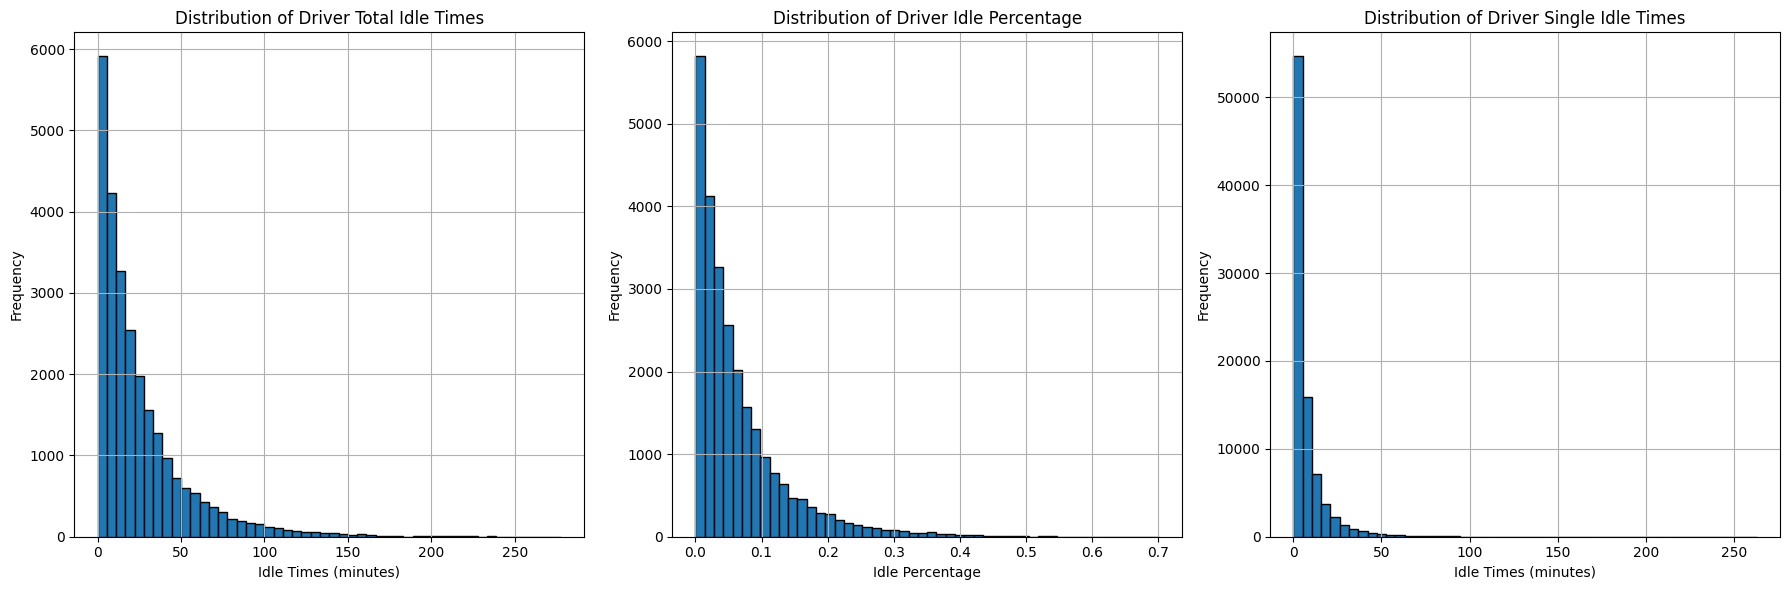

Percentage of single idle times under 1 minute: 9.49%
Percentage of single idle times under 5 minutes: 27.60%
Percentage of total idle times under 20 minutes: 57.34%


In [16]:
# Plot the driver total idle times and single idle times
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
total_data['Driver Total Idle Times'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Driver Total Idle Times')
plt.xlabel('Idle Times (minutes)')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
total_data['Driver Idle Percentages'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Driver Idle Percentage')
plt.xlabel('Idle Percentage')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
single_data['Driver Single Idle Times'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Driver Single Idle Times')
plt.xlabel('Idle Times (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

single_idle_times_under_1_min = single_data[single_data['Driver Single Idle Times'] < 1].shape[0]
percentage_under_1_min = (single_idle_times_under_1_min / single_data.shape[0]) * 100
print(f"Percentage of single idle times under 1 minute: {percentage_under_1_min:.2f}%")

single_idle_times_under_5_min = single_data[single_data['Driver Single Idle Times'] < 5].shape[0]
percentage_under_5_min = (single_idle_times_under_5_min / single_data.shape[0]) * 100
print(f"Percentage of single idle times under 5 minutes: {percentage_under_5_min:.2f}%")

total_idle_times_under_20_min = total_data[total_data['Driver Total Idle Times'] < 20].shape[0]
percentage_total_under_20_min = (total_idle_times_under_20_min / total_data.shape[0]) * 100
print(f"Percentage of total idle times under 20 minutes: {percentage_total_under_20_min:.2f}%")

### Drive Length

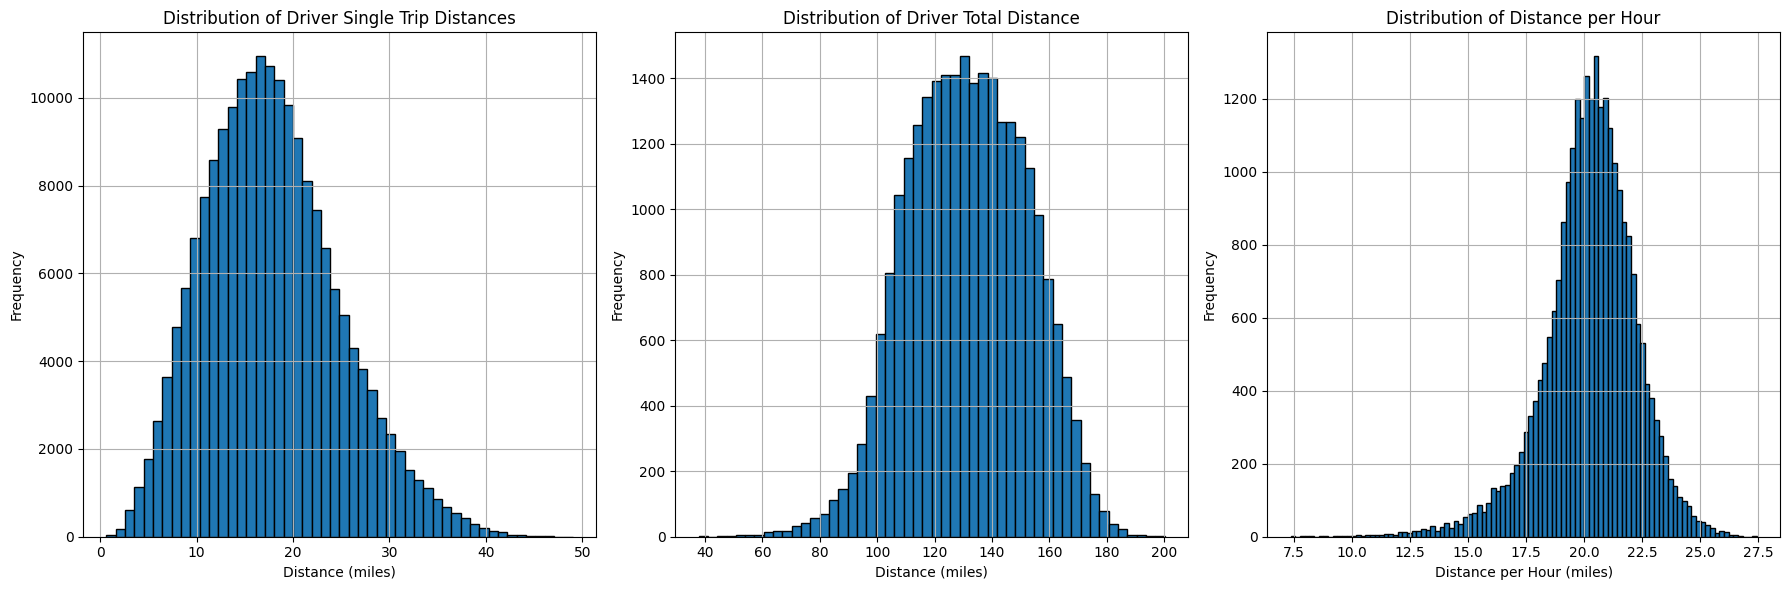

In [17]:
plt.figure(figsize=(18, 6))

# Plot the distribution of Driver Single Trip Distances
plt.subplot(1, 3, 1)
single_data['Driver Single Trip Distances'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Driver Single Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

# Plot the distribution of Driver Total Distance
plt.subplot(1, 3, 2)
total_data['Driver Total Distance'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Driver Total Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')

# Calculate the distance per hour for each driver
total_data['Distance per Hour'] = total_data['Driver Total Distance'] / (total_data['Driver Total Times'] / 60)

# Plot the distribution of 'Distance per Hour'
plt.subplot(1, 3, 3)
total_data['Distance per Hour'].hist(bins=100, edgecolor='black')
plt.title('Distribution of Distance per Hour')
plt.xlabel('Distance per Hour (miles)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Time on Job

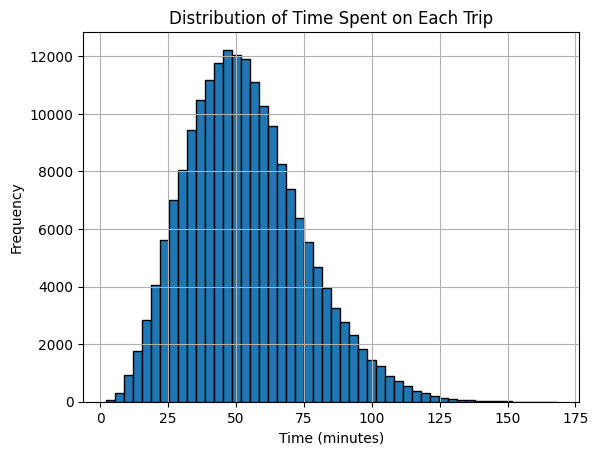

In [18]:
# Plot the distribution of Driver Single Trip Times
single_data['Driver Single Trip Times'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Time Spent on Each Trip')
plt.xlabel('Time (minutes)')
plt.ylabel('Frequency')
plt.show()